# Huffman algorithm

## Introduction

Huffman algorithm, named after its inventor David A. Huffman, is a popular data compression technique used to compress digital data such as text, images, audio, and video files. It works by assigning variable-length codes to each symbol in the input data based on their frequencies of occurrence. The more frequent the symbol, the shorter its corresponding code.

## Code

The Gaffman class implements the Huffman coding algorithm to encode and decode text. The algorithm works by building a binary tree from the characters of the input text, where the frequency of each character determines the position of the character in the tree. The more frequent characters are placed closer to the root of the tree, while less frequent characters are placed closer to the leaves.

The code imports various modules, such as bisect, time, and matplotlib.pyplot, which are used for binary searching, timing execution, and data visualization.

In [1]:
import bisect
import time
import matplotlib.pyplot as plt

The Node class represents a node in the binary tree. Each node has a poss attribute, which is the frequency of the characters represented by the node, and a left and right attribute, which are references to the left and right child nodes of the node.

In [2]:
class Node:
    '''
    Class of node in tree for gaffman algorithm.
    '''
    def __init__(self, poss, left=None, right=None):
        self.poss = poss
        self.left = left
        self.right = right
        self.codelist = ''

The Gaffman class has a build_tree() method, which builds the binary tree for the input text. The method first creates a list of nodes from the characters in the text and their frequencies. It then repeatedly merges the two nodes with the smallest frequencies to create a new node with a frequency equal to the sum of the frequencies of the two nodes. This process continues until there is only one node left in the list, which becomes the root of the binary tree.

The encode() method of the Gaffman class creates a dictionary that maps each character in the input text to its binary code based on its position in the binary tree. This is done by traversing the tree recursively and assigning a "0" to the left branch and a "1" to the right branch for each node in the tree. The binary code for each character is obtained by concatenating the "0"s and "1"s along the path from the root of the tree to the leaf node that represents the character.

The decode() method of the Gaffman class decodes the binary code back into the original text using the binary tree. It starts at the root of the tree and follows the path determined by the binary code, where "0" corresponds to the left branch and "1" corresponds to the right branch. Once a leaf node is reached, the character represented by the leaf node is added to the decoded text, and the traversal starts again from the root of the tree. Method is implemented without recursion, using for-loop.

The root_code() function and the read_code() function in the encode() method recursively traverse the tree to assign binary codes to each character and get full code of every leaf respectively.

In [3]:
class Gaffman:
    '''
    Class that have methods of encoding and decoding.
    '''
    def __init__(self):
        self.text = None
        self.root_node = None
        self.code = None


    def read_file(self, filename):
        '''
        Reads file and returns as string.
        '''
        with open(filename, 'r', encoding='utf-8') as old_f:
            content = old_f.read()
        self.text = content

    def build_tree(self, poss):
        '''
        Builds tree for Huffman algorithm.
        '''
        poss = list({Node(val): val  for val in poss}.items())
        while len(poss) > 1:
            add = poss[0][1] + poss[1][1]
            if poss[0][1] > poss[1][1]:
                node = Node(add , poss[0][0], poss[1][0])
            else:
                node = Node(add , poss[1][0], poss[0][0])
            poss = poss[2:]
            bisect.insort(poss, (node, add), key=lambda _x: _x[1])
        self.root_node = poss[0][0]
        return poss[0][0]

    def encode(self, filename2=None):
        '''
        Creates encoded file with name {filename2}.
        '''
        chars = list(set(self.text))
        d_of_possibs = {char: self.text.count(char)/len(self.text) for char in chars}
        possibs = sorted(_p[1] for _p in d_of_possibs.items())
        self.build_tree(possibs)

        def root_code(node: Node):
            '''
            Code tree.
            '''
            if node.left:
                node.left.codelist = node.codelist + '0'
                node.right.codelist = node.codelist + '1'
                root_code(node.left)
                root_code(node.right)

        def read_code(start_node: Node):
            '''
            Returns list of all codes.
            '''
            if not start_node.left:
                return [(start_node.poss, start_node.codelist)]
            else:
                return read_code(start_node.left) + read_code(start_node.right)

        root_code(self.root_node)
        code_to_proc = read_code(self.root_node)
        self.code = {}
        for char0 in chars:
            for ind, val0 in enumerate(code_to_proc):
                if d_of_possibs[char0] == val0[0]:
                    self.code[char0] = val0[1]
                    code_to_proc.pop(ind)
                    break
        if filename2:
            with open(filename2, 'w', encoding='utf-8') as new_en_f:
                content0 = ''
                for char1 in self.text:
                    content0 += self.code[char1]
                new_en_f.write(content0)

    def decode(self, encoding: dict, huff_tree: Node, filename3):
        '''
        Decode text you encoded.
        Write decoded text into file with name {filename3};
        encoding - dictionary where code is the key and character is the value;
        huff_tree - tree used to code text;
        '''
        encoded_text = self.text
        decoded_text = ''
        current_bits = ''
        current_node = huff_tree
        for char5 in encoded_text:
            if char5 == '0':
                if current_node.left:
                    current_bits += char5
                    current_node = current_node.left
                else:
                    decoded_text += encoding[current_bits]
                    current_bits = char5
                    current_node = huff_tree.left
            else:
                if current_node.right:
                    current_bits += char5
                    current_node = current_node.right
                else:
                    decoded_text += encoding[current_bits]
                    current_bits = char5
                    current_node = huff_tree.right

        with open(filename3, 'w', encoding='utf-8') as new_de_f:
            new_de_f.write(decoded_text)

    def get_reversed_code(self):
        '''
        Return reversed code dictionary.
        '''
        if self.code:
            return dict([(_x3[1], _x3[0]) for _x3 in self.code.items()])

The encode_speed_test_huffman() function tests the speed of the Huffman encoding process for several input files. It takes  as input the Huffman object and a verbose argument that, when set to True, writes the encoded text into a file. The function returns the reversed code dictionaries and Huffman trees for each input file.

In [4]:
def encode_speed_test_huffman(huffman: Gaffman, verbose=False):
    '''
    Test speed of encoding Hufmann using algorithm.
    Set verbose=True if you want to write encoded text into file.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    length = []
    times = []
    codes = []
    trees = []
    for file_name in file_names:
        huffman.read_file(file_name+'.txt')
        start = time.time()
        if verbose:
            huffman.encode(file_name+'_encoded_huffman'+'.txt')
        else:
            huffman.encode()
        finish = time.time()
        total = finish - start
        length.append(len(huffman.text))
        times.append(total)
        codes.append(huffman.get_reversed_code())
        trees.append(huffman.root_node)
    #Plotting
    plt.plot(length[:-2], times[:-2], marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    if verbose:
        plt.title('Huffman. Encoding without very large data. Writing in file.')
    else:
        plt.title('Huffman. Encoding without very large data. No writing in file.')
    plt.show()
    plt.plot(length, times, marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    if verbose:
        plt.title('Huffman. Encoding with very large data. Writing in file.')
    else:
        plt.title('Huffman. Encoding with very large data. No writing in file.')
    plt.show()
    return (codes, trees)

The decode_speed_test_huffman() function tests the speed of the Huffman decoding process for several encoded files. It takes as input the Huffman object, the reversed code dictionaries and Huffman trees generated by the encode_speed_test_huffman() function.

In [5]:
def decode_speed_test_huffman(huffman: Gaffman, codes, trees):
    '''
    Test speed of encoding Hufmann using algorithm.
    Set verbose=True if you want to write encoded text into file.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    length = []
    times = []
    for ind, file_name in enumerate(file_names):
        huffman.read_file(file_name+'_encoded_huffman'+'.txt')
        start = time.time()
        huffman.decode(codes[ind], trees[ind], file_name+'_decoded_huffman'+'.txt')
        finish = time.time()
        total = finish - start
        length.append(len(huffman.text))
        times.append(total)
    #Plotting
    plt.plot(length[:-2], times[:-2], marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    plt.title('Huffman. Decoding without very large data.')
    plt.show()
    plt.plot(length, times, marker = 'o')
    plt.xlabel('characters')
    plt.ylabel('seconds')
    plt.title('Huffman. Decoding with very large data.')
    plt.show()

The compression_value_huffman() function calculates the compression rate achieved by the Huffman algorithm for several input files. Compression rate is calculated as the 1 - (ratio of the size of the compressed file to the size of the original file (sizes are in bits)) and represented in per cents.

In [6]:
def compression_value_huffman():
    '''
    Calculates how strong text was compressed.
    '''
    file_names = ['1', '2', '3', '4', '5', '6']
    for file_name in file_names:
        print(f'Compression rate with Haffman algorithm for file {file_name}.txt equals to:')
        with open(file_name+'.txt', 'r', encoding='utf-8') as not_encoded_f:
            with open(file_name+'_encoded_huffman.txt', 'r', encoding='utf-8') as encoded_f:
                orig_size = len(not_encoded_f.read())
                comp_size = len(encoded_f.read())
                print(f'{round((1 - comp_size / (orig_size*8))*100, 2)}%\n') #orig_size is multiplied by 8 because each ASCII character weighs 8 bits.

## Test

First, let's initialize our algorithm:

In [7]:
_huffman = Gaffman()

Now we test speed without verbose:

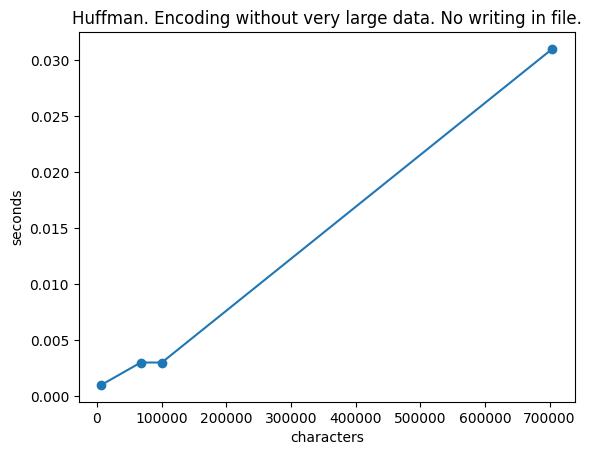

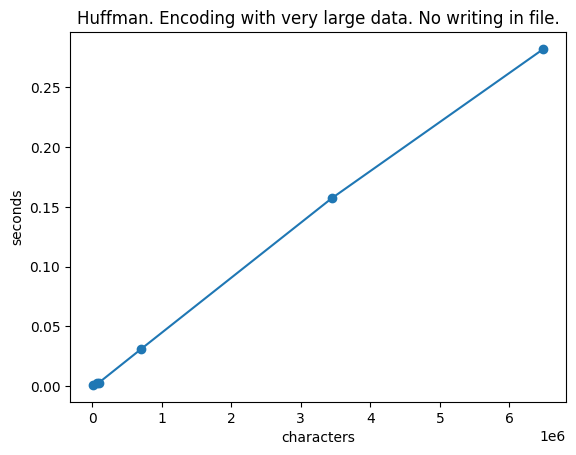

In [8]:
c_t1 = encode_speed_test_huffman(Gaffman())

Then we test speed with verbose=True:

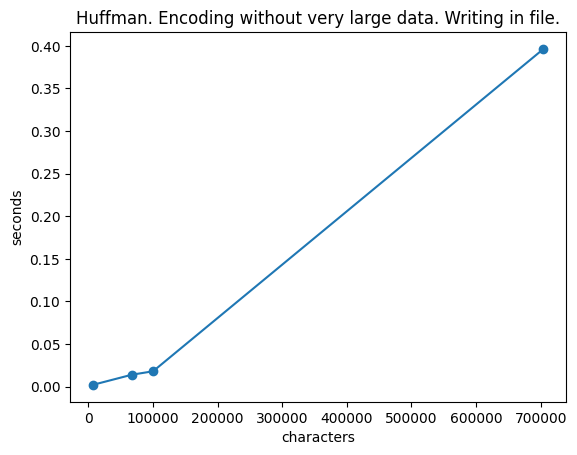

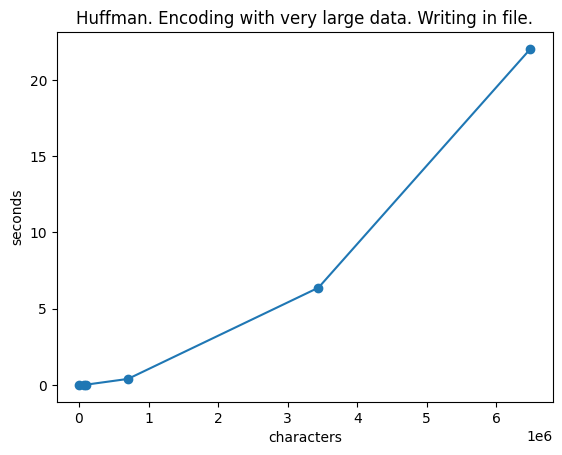

In [9]:
c_t2 = encode_speed_test_huffman(Gaffman(), verbose=True)

Testing decoding speed:

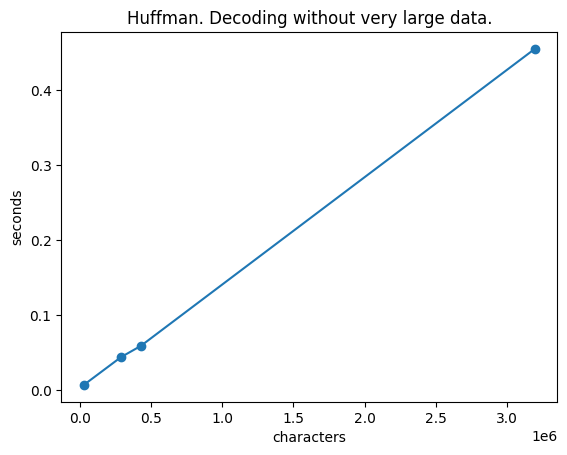

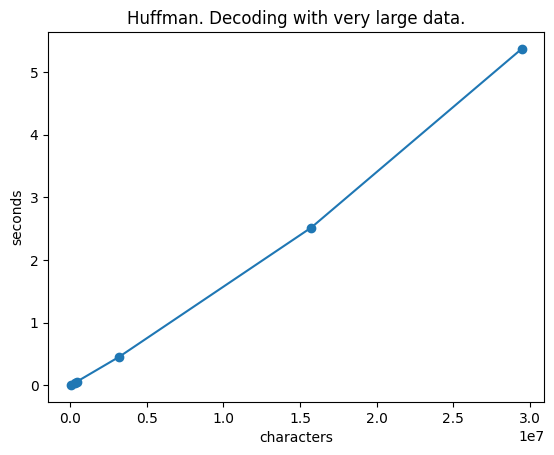

In [10]:
decode_speed_test_huffman(_huffman, c_t2[0], c_t2[1])

And at the end let's get compression rates:

In [11]:
compression_value_huffman()

Compression rate with Haffman algorithm for file 1.txt equals to:
46.56%

Compression rate with Haffman algorithm for file 2.txt equals to:
46.57%

Compression rate with Haffman algorithm for file 3.txt equals to:
46.56%

Compression rate with Haffman algorithm for file 4.txt equals to:
43.29%

Compression rate with Haffman algorithm for file 5.txt equals to:
42.86%

Compression rate with Haffman algorithm for file 6.txt equals to:
43.24%



## Conclusion

Based on the data and results obtained from using the Huffman algorithm, it can be seen that this algorithm can be an effective tool for file compression. The compression rates achieved with the algorithm for each of the files varied slightly, with file 2.txt achieving the highest compression rate of 46.57%.

Comparing it to LZW, we can see that compression rate of Huffman algorithm is not so depended on nature of data.

Regarding the efficiency of the Huffman algorithm, it has a time complexity of O(nlogn). Therefore, for smaller data, the algorithm can run very quickly. However, for larger data, the running time can increases linearly. Also it can be senn that process if building a tree and getting codes is very quick. Writing encoded into file take most of the time.

Overall, the results demonstrate the effectiveness of the Huffman algorithm in achieving compression rates and its stable effectiveness with different data.